In [1]:
import numpy as np
import pylab
import pandas as pd
%matplotlib inline

In [23]:
data= pd.read_csv('kioks.csv')

In [24]:
data.head(5)

,Date,dimension1,sessions,hits
0,3/04/2017,A01-5000-P-001,4,129
1,3/04/2017,A01-5000-P-002,5,40
2,3/04/2017,A01-5014-B-001,6,77
3,3/04/2017,A01-5165-B-001,4,68
4,3/04/2017,A04-5062-P-001,8,79


In [4]:
data.columns

Index(['Date', 'dimension1', 'sessions', 'hits'], dtype='object')

In [25]:
data.set_index('Date',inplace = True)

In [26]:
data.head(3)

,dimension1,sessions,hits
Date,,,
3/04/2017,A01-5000-P-001,4,129
3/04/2017,A01-5000-P-002,5,40
3/04/2017,A01-5014-B-001,6,77


In [27]:
data['dimension1'].unique()

array(['A01-5000-P-001', 'A01-5000-P-002', 'A01-5014-B-001',
       'A01-5165-B-001', 'A04-5062-P-001', 'A05-5082-B-001',
       'A05-5086-P-001', 'A05-5700-B-001', 'A06-5042-P-001',
       'A07-5096-P-001', 'A10-5343-P-001', 'A12-2880-P-001',
       'A13-5690-P-102', 'A14-5453-P-001', 'A16-5491-P-001',
       'A17-5554-P-002', 'A20-5280-P-001', 'A21-5290-P-001',
       'A22-5251-P-003', 'A23-5253-P-001', 'A25-5606-P-001',
       'A27-5352-P-001', 'A28-5211-P-102', 'A29-5330-P-001',
       'A30-5600-P-001', 'A32-5271-P-002', 'ALT-3025-P-102',
       'ALT-3025-P-201', 'B02-4551-P-002', 'B04-4610-P-001',
       'B06-4105-P-001', 'B06-4105-P-002', 'B06-4118-B-001',
       'B07-4170-P-001', 'B07-4178-B-001', 'B09-4127-P-101',
       'B09-4127-P-201', 'B09-4163-B-103', 'B10-4500-P-001',
       'B10-4509-B-002', 'B13-2478-P-001', 'B14-4285-P-105',
       'B15-4370-B-001', 'B15-4401-B-102', 'B15-4405-P-001',
       'B15-4413-B-001', 'B15-4455-B-002', 'B16-4343-P-001',
       'B17-2400-B-001',

In [6]:
# let us check data for 'A01-5000-P-001' box

In [28]:
box1= data[data.dimension1 == 'A01-5000-P-001']

In [29]:
box1.head()

,dimension1,sessions,hits
Date,,,
3/04/2017,A01-5000-P-001,4,129
4/04/2017,A01-5000-P-001,3,5
5/04/2017,A01-5000-P-001,1,2
6/04/2017,A01-5000-P-001,2,4
7/04/2017,A01-5000-P-001,4,45


In [30]:
box1_sessions=pd.DataFrame(data=box1,columns=[['sessions']])


In [33]:
#box1_sessions.reset_index()
#box1_sessions=pd.DataFrame(data=box1_sessions,columns =[['Date','sessions']])
box1_sessions.reset_index(inplace = True)

In [34]:
box1_sessions['Date'] = pd.to_datetime(box1_sessions['Date'])

In [35]:
box1_sessions.set_index('Date',inplace = True)

In [36]:
box1_sessions.head(5)

,sessions
Date,
2017-03-04,4
2017-04-04,3
2017-05-04,1
2017-06-04,2
2017-07-04,4


In [37]:
box1_sessions.index.dtype

dtype('<M8[ns]')

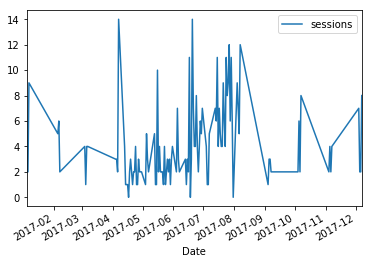

In [47]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,14))
box1_sessions.plot()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


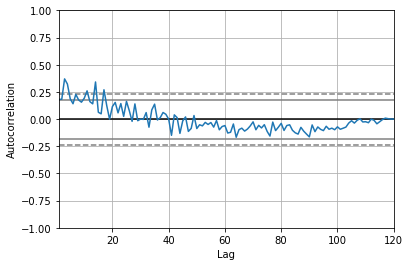

In [49]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(box1_sessions)
plt.show()

In [51]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(box1_sessions, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'